# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [28]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
#clf = clf.fit(iris.data, iris.target) #non serve
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [29]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target) #qua serve perchè il fit è fittizio, serve solo per salvare il dataset
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

# shows the model predictions  
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))


[0.93333333 1.         1.         0.96666667 1.        ]
[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]]
0
0 ok setosa
[4.9 3.  1.4 0.2]
[[4.9 3.  1.4 0.2]]
0
1 ok setosa
[4.7 3.2 1.3 0.2]
[[4.7 3.2 1.3 0.2]]
0
2 ok setosa
[4.6 3.1 1.5 0.2]
[[4.6 3.1 1.5 0.2]]
0
3 ok setosa
[5.  3.6 1.4 0.2]
[[5.  3.6 1.4 0.2]]
0
4 ok setosa
[5.4 3.9 1.7 0.4]
[[5.4 3.9 1.7 0.4]]
0
5 ok setosa
[4.6 3.4 1.4 0.3]
[[4.6 3.4 1.4 0.3]]
0
6 ok setosa
[5.  3.4 1.5 0.2]
[[5.  3.4 1.5 0.2]]
0
7 ok setosa
[4.4 2.9 1.4 0.2]
[[4.4 2.9 1.4 0.2]]
0
8 ok setosa
[4.9 3.1 1.5 0.1]
[[4.9 3.1 1.5 0.1]]
0
9 ok setosa
[5.4 3.7 1.5 0.2]
[[5.4 3.7 1.5 0.2]]
0
10 ok setosa
[4.8 3.4 1.6 0.2]
[[4.8 3.4 1.6 0.2]]
0
11 ok setosa
[4.8 3.  1.4 0.1]
[[4.8 3.  1.4 0.1]]
0
12 ok setosa
[4.3 3.  1.1 0.1]
[[4.3 3.  1.1 0.1]]
0
13 ok setosa
[5.8 4.  1.2 0.2]
[[5.8 4.  1.2 0.2]]
0
14 ok setosa
[5.7 4.4 1.5 0.4]
[[5.7 4.4 1.5 0.4]]
0
15 ok setosa
[5.4 3.9 1.3 0.4]
[[5.4 3.9 1.3 0.4]]
0
16 ok setosa
[5.1 3.5 1.4 0.3]
[[5.1 3.5 1.4 0.3]]
0
17 ok setosa

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [30]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #i pesi dei voti dipendono dalla distanza
clf_knn2.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn2, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

[0.96666667 1.         1.         0.96666667 1.        ]
0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicol

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14


C:\Users\OliverioM\AppData\Local\Temp\ipykernel_2932\469533143.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.9166666666666666
k neighbors=26
accuracy=0.9166666666666666
k neighbors=27
accuracy=0.9333333333333333
k neighbors=28
accuracy=0.9333333333333333
k neighbors=29
accuracy=0.9333333333333333
k neighbors=30
accuracy=0.9166666666666666
k neighbors=31
accuracy=0.9333333333333333
k neighbors=32
accuracy=0.9166666666666666
k neighbors=33
accuracy=0.9333333333333333
k neighbors=34
accuracy=0.9166666666666666
k neighbors=35
accuracy=0.9333333333333333
k neighbors=36
accuracy=0.9166666666666666
k neighbors=37
accuracy=0.9333333333333333
k neighbors=38
accuracy=0.

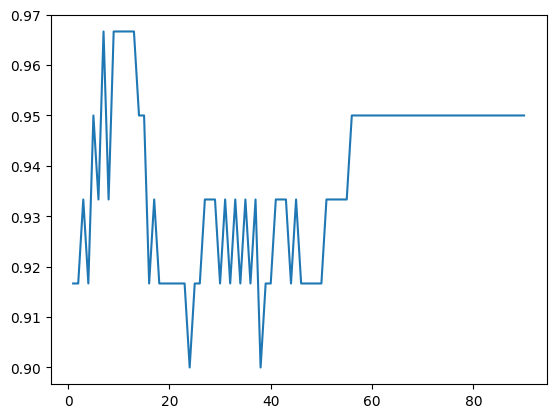

In [31]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

C:\Users\OliverioM\AppData\Local\Temp\ipykernel_2932\1723528131.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


accuracy=0.9
k neighbors=28
accuracy=0.8833333333333333
k neighbors=29
accuracy=0.9
k neighbors=30
accuracy=0.8666666666666667
k neighbors=31
accuracy=0.9
k neighbors=32
accuracy=0.8666666666666667
k neighbors=33
accuracy=0.8833333333333333
k neighbors=34
accuracy=0.8666666666666667
k neighbors=35
accuracy=0.8833333333333333
k neighbors=36
accuracy=0.8666666666666667
k neighbors=37
accuracy=0.8833333333333333
k neighbors=38
accuracy=0.8666666666666667
k neighbors=39
accuracy=0.8666666666666667
k neighbors=40
accuracy=0.8666666666666667
k neighbors=41
accuracy=0.8333333333333334
k neighbors=42
accuracy=0.8166666666666667
k neighbors=43
accuracy=0.8166666666666667
k neighbors=44
accuracy=0.8166666666666667
k neighbors=45
accuracy=0.85
k neighbors=46
accuracy=0.8333333333333334
k neighbors=47
accuracy=0.85
k neighbors=48
accuracy=0.85
k neighbors=49
accuracy=0.85
k neighbors=50
accuracy=0.85
k neighbors=51
accuracy=0.8333333333333334
k neighbors=52
accuracy=0.8166666666666667
k neighbors=

C:\Users\OliverioM\AppData\Local\Temp\ipykernel_2932\1723528131.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=46
accuracy=0.9166666666666666
k neighbors=47
accuracy=0.9166666666666666
k neighbors=48
accuracy=0.9166666666666666
k neighbors=49
accuracy=0.9166666666666666
k neighbors=50
accuracy=0.9166666666666666
k neighbors=51
accuracy=0.9333333333333333
k neighbors=52
accuracy=0.9333333333333333
k neighbors=53
accuracy=0.9333333333333333
k neighbors=54
accuracy=0.9333333333333333
k neighbors=55
accuracy=0.9333333333333333
k neighbors=56
accuracy=0.95
k neighbors=57
accuracy=0.95
k neighbors=58
accuracy=0.95
k neighbors=59
accuracy=0.95
k neighbors=60
accuracy=0.95
k neighbors=61
accuracy=0.95
k neighbors=62
accuracy=0.95
k neighbors=63
accuracy=0.95
k neighbors=64
accuracy=0.95
k neighbors=65
accuracy=0.95
k neighbors=66
accuracy=0.95
k neighbors=67
accuracy=0.95
k neighbors=68
accuracy=0.95
k neighbors=69
accuracy=0.95
k neighbors=70
accuracy=0.95
k neighbors=71
accuracy=0.95
k neighbors=72
accuracy=0.95
k neighbors=73
accuracy=0.95
k neighbors=74
accuracy=0.95
k neighbors=75
accu

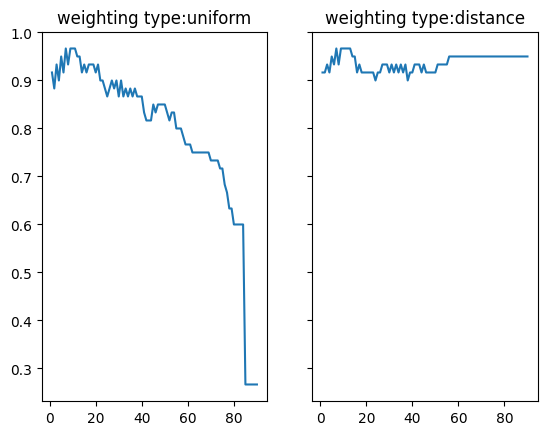

In [32]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

C:\Users\OliverioM\AppData\Local\Temp\ipykernel_2932\1612611206.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing



 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

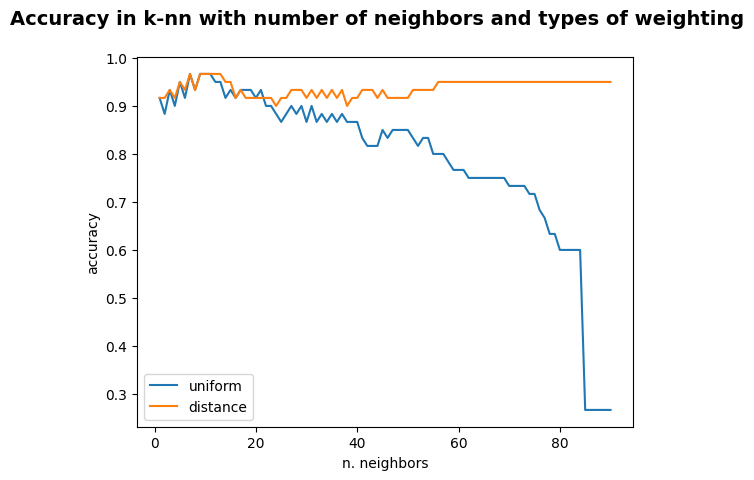

In [33]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


## What you have to do: 

1. mostrare lo scatter plot (in 2D, scegliendo 2 delle 4 features) dei dati di Iris, con un colore determinato dalla classe (colore rosso per Setosa, blu per Versicolor, verde per Virginica). Quale sono secondo voi le 2 feature migliori da usare?


[5.006 3.428 1.462 0.246 0.   ]
[5.936 2.77  4.26  1.326 1.   ]
[6.588 2.974 5.552 2.026 2.   ]


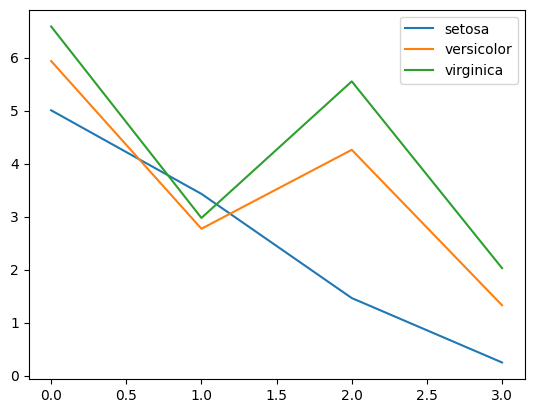

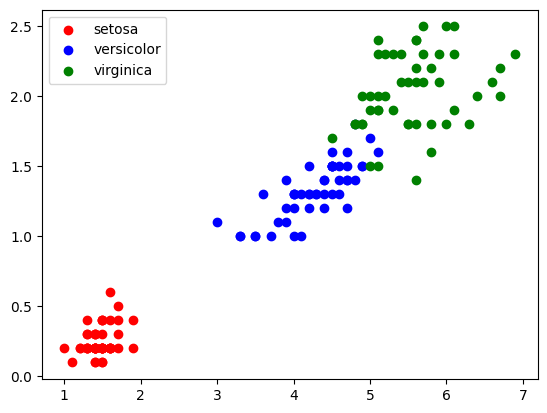

In [88]:
from sklearn.datasets import load_iris

iris = load_iris()

# add iris.target as a new column to iris.data
total = np.c_[iris.data, iris.target]
#show only row with target=1 and target=2
total0 = total[total[:,4] == 0]
total1 = total[total[:,4] == 1]
total2 = total[total[:,4] == 2]

#make average of each column
total0avg = np.mean(total0, axis=0)
total1avg = np.mean(total1, axis=0)
total2avg = np.mean(total2, axis=0)

print(total0avg)
print(total1avg)
print(total2avg)

#plot the average of each column
#remove the last column (target)
total0avg = total0avg[:-1]
total1avg = total1avg[:-1]
total2avg = total2avg[:-1]

plt.plot(total0avg, label='setosa')
plt.plot(total1avg, label='versicolor')
plt.plot(total2avg, label='virginica')
plt.legend()
plt.show()


#remove the last column (target)
total0 = total0[:-1]
total1 = total1[:-1]
total2 = total2[:-1]

#plotto la feature 3 e la feature 4 in quanto sono quelle più distinte
plt.scatter(total0[:,2], total0[:,3], color="red", label='setosa')
plt.scatter(total1[:,2], total1[:,3], color="blue", label='versicolor')
plt.scatter(total2[:,2], total2[:,3], color="green", label='virginica')
plt.legend()
plt.show()

2. mostrare uno scatter plot simile, ma ora il colore dei punti e` determinato dalla classe stimata da k-nn, con un valore scelto di k a vostra scelta.



Punti colorati in base alla predizione


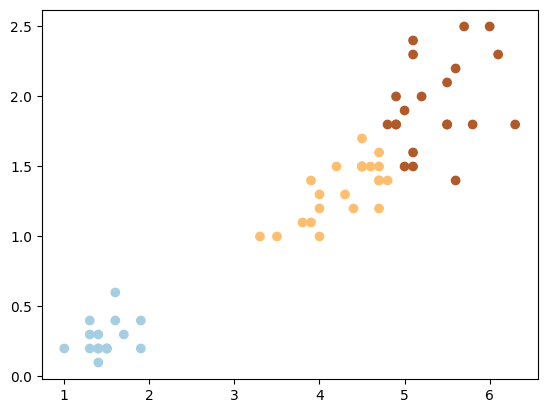

Punti colorati in base alla classe reale


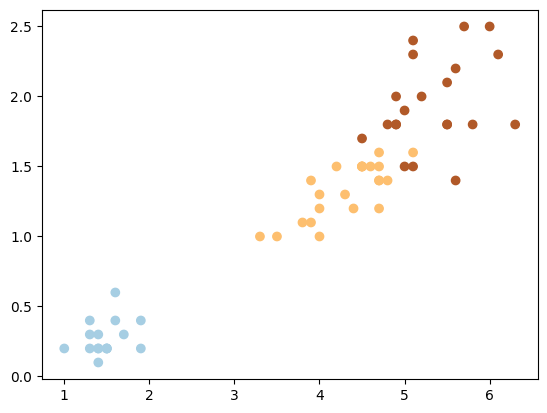

In [91]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf_knn = neighbors.KNeighborsClassifier(7, weights='distance')
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

#make scatter plot of the first two features
print("Punti colorati in base alla predizione")
plt.scatter(X_test[:,2], X_test[:,3], c=y_pred, cmap=plt.cm.Paired)
plt.show()

print("Punti colorati in base alla classe reale")
plt.scatter(X_test[:,2], X_test[:,3], c=y_test, cmap=plt.cm.Paired)
plt.show()



3. Visualizzate il ROC plot del migliore albero di decisione che avete addestrato nell'esercizio n.1 

[0.         0.02564103 1.        ]
[0.         0.95238095 1.        ]
0.9633699633699633


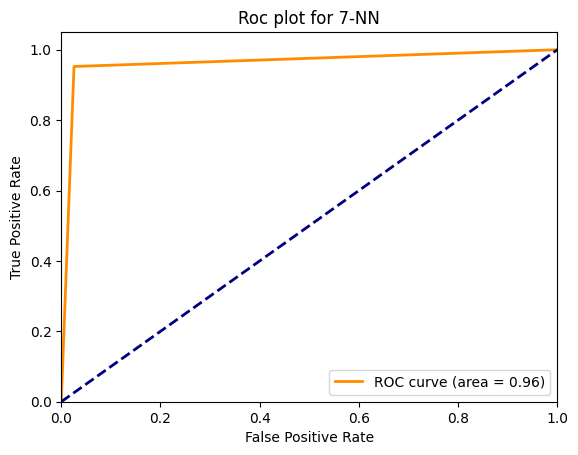

In [102]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf_knn = neighbors.KNeighborsClassifier(7, weights='distance')
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

#show roc plot
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], label_binarize(y_pred, classes=[0, 1, 2])[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(fpr[2])
print(tpr[2])
print(roc_auc[2])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc plot for 7-NN')
plt.legend(loc="lower right")
plt.show()

4. Confrontare gli alberi decisione e k-nn sullo spazio ROC: per quali valori di (TPR,FPR) k-nn e` meglio degli alberi di decisione?

In [103]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf_knn = neighbors.KNeighborsClassifier(7, weights='distance')
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

In [104]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
import numpy as np

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(X_train, y_train)

#predict
y_pred_clf = clf.predict(X_test)

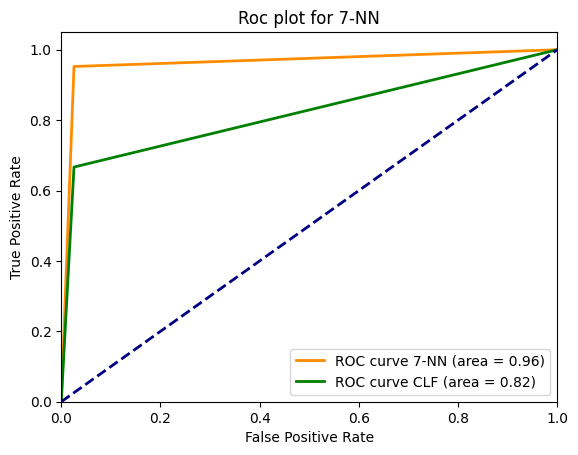

In [106]:
# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], label_binarize(y_pred_knn, classes=[0, 1, 2])[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

fpr_clf = dict()
tpr_clf = dict()
roc_auc_clf = dict()

for i in range(3):
    fpr_clf[i], tpr_clf[i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], label_binarize(y_pred_clf, classes=[0, 1, 2])[:, i])
    roc_auc_clf[i] = auc(fpr_clf[i], tpr_clf[i])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_knn[2], tpr_knn[2], color='darkorange',
            lw=lw, label='ROC curve 7-NN (area = %0.2f)' % roc_auc_knn[2])
plt.plot(fpr_clf[2], tpr_clf[2], color='green',
            lw=lw, label='ROC curve CLF (area = %0.2f)' % roc_auc_clf[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc plot for 7-NN')
plt.legend(loc="lower right")
plt.show()

5.  Eseguite k-nn ma ora usate come funzione di distanza una funzione:

    distance(x,y)= 1- k(x,y) 

    dove k(x,y) e` un Kernel Gaussian-like  k(x,y) (per k(x,y) usate la Radial Basis Function con il parametro Gamma  = 1/sigma^2) che controlla la sua ampiezza.

    Il parametro gamma deve essere aggiustato (tuned) al valore ottimale, a secondo dell'accuratezza del k-nn (in modo simile a quanto abbiamo fatto precedentemente per il parametro n_neighbors). In questo caso, scegliete un valore di k=7.